<a href="https://colab.research.google.com/github/sglhsr/Machine_Learing/blob/main/20220315_colab02CNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

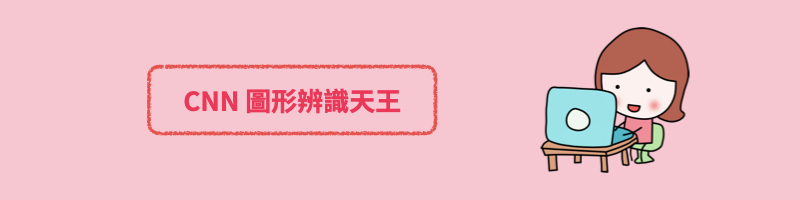

In [ ]:
%matplotlib inline
#0719 CNN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
#Conv2D: 彩色圖是RGB三個圖層時, 每個矩陣是三層都有 立體的
#之前是手寫辨識黑白的所以只有一層
#fillter是3*3*3=27個全重的矩陣
#2D指每組矩陣fillter算完往2D的方向向右橫移而已
from tensorflow.keras.layers import Dense, Flatten
#Flatten把資料拉平
from tensorflow.keras.optimizers import SGD

檢查是否使用 GPU

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

進一步知道用了什麼 GPU

In [ ]:
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-f45358af-c656-44b3-a3e8-a0666760a30e)


### 1. 讀入 MNSIT 數據集

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


### 2. 資料整理

#### Channel

CNN 要注意一張圖有多少個 channel, 開始我們因為只有灰階, 所以只有一個 channel。因此我們要轉一下我們的資料格式:

    (28,28) --> (28, 28, 1)
channel=記分板
彩色:28*28*3(RGB三層)
=>3個fillter 所以3個channel
灰階:28*28*1 (目前的)

In [ ]:
x_train = x_train.reshape(60000, 28, 28, 1) / 255
#x_train=x_train.reshape(-1,28,28,1)/255  
#第一個-1就是讓系統自動抓陣列大小

In [ ]:
x_test = x_test.reshape(10000, 28, 28, 1) / 255

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 3. step 1: 打造函數學習機 (CNN)

In [ ]:
model = Sequential()
#filter 3*3 隨便設
#pooling 2*2 因圖幾乎是2的n次方

In [ ]:
#13個fillter 每層遞增,每個filter大小3*3,
# padding same 讓記分板跟源檔一樣shape的矩陣 通常外圍加一層0
model.add(Conv2D(16, (3,3), padding='same',
                input_shape=(28,28,1),
                activation='relu'))

In [ ]:
#記分板分群抓出一個數值,通常取平均值或極大值,減少參數數量
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
#第二層 filter遞增到32, 前面已知大小,不用input_shape
model.add(Conv2D(32, (3,3), padding='same',
                activation='relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
#第三層
model.add(Conv2D(64, (3,3), padding='same',
                activation='relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
#好幾個小記分板 拉平成一串向量
model.add(Flatten())

In [ ]:
#54個神經元是隨便打的
model.add(Dense(64, activation='relu'))
#也有人這裡用global pooling或average global pooling取代Dense
#global pooling: 把每個記分板都轉成一個代表數字,param參數數就=記分板數

In [ ]:
model.add(Dense(10, activation='softmax'))

#### 看一下我們的神經網路

In [ ]:
model.summary()
#L1 (每個filter 3*3個值+1 自己的bias)*16個filter=16個param
#padding=same,所以輸出也是(28,28,16個filter),本來是(26,26,n)
#None是batch數 沒寫=設彈性
#L2 1ˊˊ(第一層filter數)*32(第二層filter數)*3*3+32=4640
#max_pooling2d=0 因pooling只是群組完取極大值 沒有參數

#L3 32(第二層filter數)*64(第三層filter數)*3*3+64=18496
#flatten拉平=3*3*53=477

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

#### 組裝

In [ ]:
model.compile(loss='mse', optimizer=SGD(learning_rate=0.087),
             metrics=['accuracy'])

### 4. step 2: fit

In [ ]:
model.fit(x_train, y_train, batch_size=128, epochs=12)
#觀察accuracy有沒有遞增, loss function(跟正確值的誤差,主要觀察趨勢)越來越低,表示還能再訓練

Epoch 1/12
469/469 [==============================] - 15s 10ms/step - loss: 0.0899 - accuracy: 0.1606
Epoch 2/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0896 - accuracy: 0.2151
Epoch 3/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0893 - accuracy: 0.2230
Epoch 4/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0884 - accuracy: 0.2594
Epoch 5/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0850 - accuracy: 0.3806
Epoch 6/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0555 - accuracy: 0.6506
Epoch 7/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0231 - accuracy: 0.8575
Epoch 8/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0138 - accuracy: 0.9130
Epoch 9/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0107 - accuracy: 0.9320
Epoch 10/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0089 - accuracy: 0.94

### 5. Step 3: 預測

In [ ]:
#這裡的n要reshape(1,28,28,1)
y_predict = np.argmax(model.predict(x_test), axis=-1)

0.0010749217


#### 看看測試資料表現如何

In [ ]:
loss, acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0053 - accuracy: 0.9660


In [ ]:
print(f'測試資料的正確率為 {acc*100:.2f}%')

測試資料的正確率為 96.60%


In [ ]:
def my_predict(n):
    print('我可愛的 CNN 預測是', y_predict[n])
    X = x_test[n].reshape(28,28)
    plt.imshow(X, cmap='Greys')

In [ ]:
from ipywidgets import interact_manual

In [ ]:
interact_manual(my_predict, n=(0, 9999));

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

### 6. 把我們的 model 存起來

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [ ]:
model.save('my_cnn_model')

INFO:tensorflow:Assets written to: my_cnn_model/assets
